In [163]:
import pandas as pd

In [350]:
# Passengers_at_dropoff = pd.read_csv(r'\Datasets\Total_Passengers_departures.csv')
Passengers_at_dropoff = pd.read_csv(r"C:\Users\CiSTUP\OneDrive - Indian Institute of Science\vs_codes\vissim_parking\Datasets\Total_Passengers_departures.csv")

# Passengers_for_pickup = pd.read_csv(r'\Datasets\Total_Passengers_Arrival.csv')
Passengers_for_pickup = pd.read_csv(r"C:\Users\CiSTUP\OneDrive - Indian Institute of Science\vs_codes\vissim_parking\Datasets\Total_Passengers_Arrival.csv")

In [351]:
Passengers_for_pickup['Total_Passengers'] = Passengers_for_pickup['Total_Passengers'] * 0.3
Passengers_for_pickup['Total_Passengers'] = Passengers_for_pickup['Total_Passengers'].round()
Passengers_at_dropoff['Total_Passengers'] = Passengers_at_dropoff['Total_Passengers'] * 0.3
Passengers_at_dropoff['Total_Passengers'] = Passengers_at_dropoff['Total_Passengers'].round()

In [352]:
difference =  Passengers_for_pickup['Total_Passengers'] - Passengers_at_dropoff['Total_Passengers'] 

In [ ]:
Passengers_at_dropoff

In [263]:
difference

0        0
1        0
2        0
3       35
4       63
        ..
1435    23
1436    23
1437    23
1438   -10
1439    29
Name: Total_Passengers, Length: 1440, dtype: int64

In [353]:
# crate a new dataframe with the difference
difference_df = pd.DataFrame()

In [354]:
difference_df['difference'] = difference

In [355]:
difference_df['time'] = Passengers_at_dropoff['TIME']

In [310]:
# plot cdf of the difference
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")


In [13]:
from scipy.stats import cumfreq


In [356]:
# plot commulative difference values on y axis and time on x axis
# y = commulative difference values
x = np.array(difference_df['time'])
y = np.cumsum(difference_df['difference'])

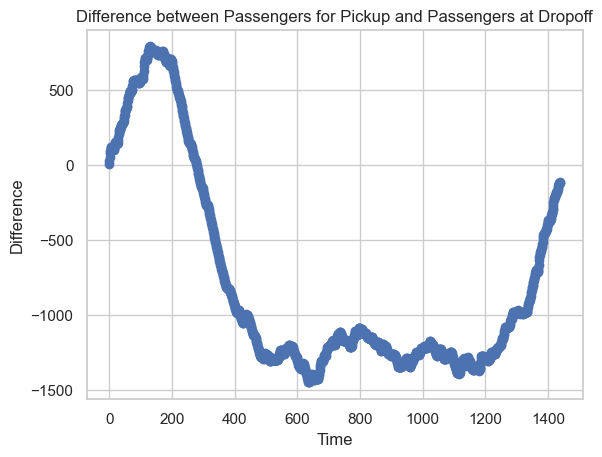

In [357]:
plt.plot(x, y, marker='o', linestyle='-', color='b')
plt.xlabel('Time')
plt.ylabel('Difference')
plt.title('Difference between Passengers for Pickup and Passengers at Dropoff')
plt.show()

In [ ]:
%pip install requests

In [ ]:
%pip install bs4

In [4]:
import requests
from bs4 import BeautifulSoup

In [7]:
import requests

url = "https://mybmtc.karnataka.gov.in/new-page/Airport%20Vayu%20vajra%20Services/en"

# Send an HTTP request to the URL with SSL verification disabled
response = requests.get(url, verify=False)
# response = requests.get(url)



c:\Users\CiSTUP\OneDrive - Indian Institute of Science\vs_codes\vissim_parking\.venv\Lib\site-packages\urllib3\connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host 'mybmtc.karnataka.gov.in'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [8]:
response

<Response [200]>

In [12]:
# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table containing the timetable data
table = soup.find('table', {'class': 'table'})



In [ ]:
soup.find_all("table", class_="table-striped")

In [23]:
div_element = soup.find("div", class_="col-md-offset-0 col-md-12")



In [31]:
ROWS = div_element.find_all('tr')

In [32]:
# Extract the column headers
column_headers = [v.text for v in ROWS[0].find_all('th')]

In [48]:
li = []

In [146]:
dep_from_airport = []
dep_from_city = []

In [147]:
li2 = []

In [148]:
for row in li:
    ele = row.split('\n')
    # print(ele)
    if ele[1].startswith('0') or ele[1].startswith('1') or ele[1].startswith('2') or ele[1].startswith('3') or ele[1].startswith('4') or ele[1].startswith('5') or ele[1].startswith('6') or ele[1].startswith('7') or ele[1].startswith('8') or ele[1].startswith('9'):
        # print(ele)
        for i in range(1,7):
            element = ele[i].strip('\xa0')
            # print()
            dep_from_airport.append(element)
        for i in range(7,13):
            element = ele[i].strip('\xa0')
            dep_from_city.append(element)
            print(element)

    elif len(ele) >= 4 and (ele[1].startswith('K') or ele[2].startswith('K') or ele[3].startswith('K') or ele[4].startswith('K')):
        li2.append(row)
        
    # break
    #     print(ele)

3:00
4:00
4:50
5:30
6:00
6:30
7:00
7:30
8:00
9:00
9:50
10:30
11:30
17:45
18:10
19:00
19:30
20:10
21:00
22:10
23:10



12:15
13:00
13:35
14:05
14:30
15:40
16:10
16:40
17:00
18:20


6:20
7:00
8:00
8:30
9:00
9:30
10:00
10:40
11:05
11:30
12:00
12:30
13:00
13:45
14:15
14:45

15:15
15:50
16:10
16:30
16:55
17:15
17:35
17:55
18:15
18:35
18:55
19:15
19:45
20:05
20:45
21:30
23:10


21:20
22:10




5:00
6:05
6:45
7:50
8:45
12:00
16:00
16:50
17:30
18:00
19:20
20:30
21:30
23:00




06:00
06:30
07:00
07:30
08:00
08:20
08:40
09:00
09:25
10:20
11:00
11:40
12:20
13:00
13:20
14:00
14:40
15:10
15:50
16:30
17:05
17:25
17:45
18:05
18:25
18:45
19:05
19:25
20:05

20:45
21:25
22:05
22:45


03:20
03:55
04:40
05:25
06:00
06:10
06:20
06:40
06:50
07:30
08:10
08:20
08:45
09:30
10:30
11:00
11:30
12:00
12:10
12:30
12:50
13:25
13:50
14:20
14:30
15:35
15:55
16:50
17:10
17:30
18:00
18:20
18:30
18:50
19:40
20:20
20:30
21:00
21:10
21:30
22:00
22:10
22:35
23:20
23:40















7:20
07:50
09:15
10:00
10:20
10:40
10:50

In [257]:
times_list = ["0:25", "0:50", "1:20", "1:40", "2:00","2:20","2:40","3:00",
    "3:20", "3:40", "4:00", "4:20", "4:40", "5:00", "5:20", "5:40",
    "6:00", "6:15", "6:30", "6:45", "7:05", "7:25", "7:45", "8:00",
    "8:15", "8:30", "8:45", "9:00", "9:15", "9:30", "9:45", "10:00",
    "10:15", "10:30", "10:45", "11:00", "11:15", "11:30", "11:45",
    "12:00", "12:10", "12:20", "12:30", "12:40", "12:55", "13:10",
    "13:20","13:30","13:40","13:50","14:00","14:15","14:30","14:40",
    '14:55','14:55','14:55','15:05','15:45','15:55','16:05',
    '16:15','16:25','16:35','16:50','17:00','17:15','17:30','17:45',
    '18:00','18:10','18:20','18:30','18:40','18:50','19:00',
    '19:15','19:30','19:40','19:50','20:00', '20:15', '20:30', '20:45', '21:00',
    '21:15', '21:30', '21:45', '22:00', '22:20', '22:40', '23:00',
    '23:20', '23:40'
]

In [221]:
times_list_2 = [
    "03:30", "5:10", "5:50", "7:40", "8:30", "9:45", "15:10", "16:30",
    "17:40", "19:00", "20:10", "20:50", "3:05", "4:10", "6:30", "7:10",
    "15:45", "16:15", "19:20", "20:40"
]

In [149]:
li2 = li2[2:]

In [103]:
li2

['\n\n\xa0\nKIA-5\n\nKIA-Banashankari\xa0\xa0\xa0\xa0\xa0\n\n\nHebbala,Mekri Circle, MG Road, Shantinagar TTMC, Jayanagar 4th Block, J.p Nagar 6th Phase \xa0 \xa0\n\xa0\n\xa0\n\xa0\n\n\n\xa0\n\xa0\n01:50\xa0\xa0\xa0\n\xa0\n\xa0\n\xa0\n\xa0\n\xa0\n\xa0\n\xa0\n\xa0\n\n\xa000:50\n1:00\n3:00\n4:00\xa0\n6:00\n6:30\n0:05\n1:00\n04:00\n4:30\n5:10\xa0\n5:40\n',
 '\nKIA-5D\nKIA-Brigade Meadows Kanakpura Road\nHebbala,Mekri Circle, MG Road, Shantinagar TTMC, Jayanagar 4th Block\n02:20\n\xa02:00\n\xa05:00\n\xa006:15\n\xa006:50\n14:55\n17:45\n04:30\xa0\n07:30\xa0\n09:20\xa0\n10:20\xa0\n17:40\xa0\n20:25\xa0\n',
 '\n\nKIA-6\n\xa0\n\n\nKIA-KDG\n\xa0\n\n\nHebbala, M.G Road,Marathahalli,White Field. Hope Farm\n\n\n02:00\n\xa0\n\xa0\n\n\xa0\n\xa0\n',
 '\nKIA-6A\nKIA-Kadugodi Bus Station\nHebbala,Tin Factory, K.R.Puram Rly, Garudachar Palyra, Hoodi Circle, ITPL Hope Farm\n2:00\n5:45\n7:45\n14:00\n14:50\n\xa0\n\xa0\n3:30\n5:40\n11:00\n12:30\n16:35\n18:30\n',
 '\nKIA-7\nKIA - HSR KEB JUNCTION\xa0\nGuttahal

In [ ]:
for row in li2:
    if row == li2[2] or row == li2[4]:
        continue
    ele = row.split('\n')
    for i in ele[-7:-1]:
        i = i.strip('\xa0')
        dep_from_city.append(i)
        print(i)
    for i in ele[-13:-7]:
        i = i.strip('\xa0')
        dep_from_airport.append(i)
        print(i)
    # break
    # print(ele)

In [ ]:
dep_from_airport

In [159]:
len(dep_from_city)

452

In [152]:
# remove empty strings from the list
dep_from_airport = list(filter(None, dep_from_airport))
dep_from_city = list(filter(None, dep_from_city))

In [ ]:
Passengers_at_dropoff

In [349]:
Passengers_for_pickup

,Total_Passengers,TIME
0,25.0,0
1,40.0,1
2,67.0,2
3,66.0,3
4,41.0,4
...,...,...
1435,15.0,1435
1436,15.0,1436
1437,15.0,1437
1438,0.0,1438


In [ ]:
dep_from_airport

In [169]:
# convert the time in list to 1 minute from midnight format from ''HH:MM" format
dep_from_airport_time = []
for time in dep_from_airport:
    # if time in times_list:
    #     hour, minute = time.split(':')
    #     converted_time = int(hour) * 60 + int(minute) + 60
    #     dep_from_airport_time.append(converted_time)
    #     times_list.remove(time)
    # elif time in times_list_2:
    #     hour, minute = time.split(':')
    #     converted_time = int(hour) * 60 + int(minute) + 180
    #     dep_from_airport_time.append(converted_time)
    #     times_list_2.remove(time)
    try:
        hour, minute = time.split(':')
        time = int(hour) * 60 + int(minute)
        dep_from_airport_time.append(time)
        print(f"Invalid time format: {time}")
    # hour, minute = time.split(';')
    # time = int(hour) * 60 + int(minute) + 120
    # dep_from_airport_time.append(time)
    # print(f"Invalid time format: {time}")

    except ValueError:
        hour, minute = time.split(';')
        time = int(hour) * 60 + int(minute)
        dep_from_airport_time.append(time)
        print(f"Invalid time format: {time}")


Invalid time format: 1220


In [222]:
dep_from_city_time = []
for time in dep_from_city:
    if time in times_list:
        hour, minute = time.split(':')
        converted_time = int(hour) * 60 + int(minute) + 60
        if converted_time >= 1440:
            converted_time = converted_time - 1440
        dep_from_city_time.append(converted_time)
        times_list.remove(time)
    elif time in times_list_2:
        hour, minute = time.split(':')
        converted_time = int(hour) * 60 + int(minute) + 180
        if converted_time >= 1440:
            converted_time = converted_time - 1440
        dep_from_city_time.append(converted_time)
        times_list_2.remove(time)
    else:
        hour, minute = time.split(':')
        if converted_time >= 1440:
            converted_time = converted_time - 1440
        time = int(hour) * 60 + int(minute) + 120
        dep_from_city_time.append(converted_time)
    # try:
    #     hour, minute = time.split(':')
    #     time = int(hour) * 60 + int(minute) + 120
    #     dep_from_city_time.append(time)
    # except ValueError:
    #     hour, minute = time.split(';')
    #     time = int(hour) * 60 + int(minute)
    #     dep_from_city_time.append(time)
    #     print(f"Invalid time format: {time}")

In [223]:
dep_from_city_time.sort()

In [ ]:
dep_from_city_time

In [336]:
for time in dep_from_city_time:
    count = 30
    for i in range(0,30,1):
        if time + i < 1440 :
            if  Passengers_at_dropoff['Total_Passengers'][time + i] >= count:
                Passengers_at_dropoff.loc[time + i ,'Total_Passengers'] = Passengers_at_dropoff['Total_Passengers'][time + i] - count
                count = 0
            elif Passengers_at_dropoff['Total_Passengers'][time + i] < count:
                count = count - Passengers_at_dropoff['Total_Passengers'][time + i]
                Passengers_at_dropoff.loc[time + i ,'Total_Passengers'] = 0
        elif time + i >= 1440:
            if  Passengers_at_dropoff['Total_Passengers'][time + i - 1440] >= count:
                Passengers_at_dropoff.loc[time + i - 1440 ,'Total_Passengers'] = Passengers_at_dropoff['Total_Passengers'][time + i - 1440] - count
                count = 0
            elif Passengers_at_dropoff['Total_Passengers'][time + i - 1440] < count:
                count = count - Passengers_at_dropoff['Total_Passengers'][time + i - 1440]
                Passengers_at_dropoff.loc[time + i - 1440 ,'Total_Passengers'] = 0
        if count == 0:
            break
            


In [337]:
Passengers_at_dropoff["Total_Passengers"].sum()

11205.0

In [361]:
Passengers_at_dropoff.to_csv("Passengers_at_dropoff_with_lf_bus.csv", index=False)

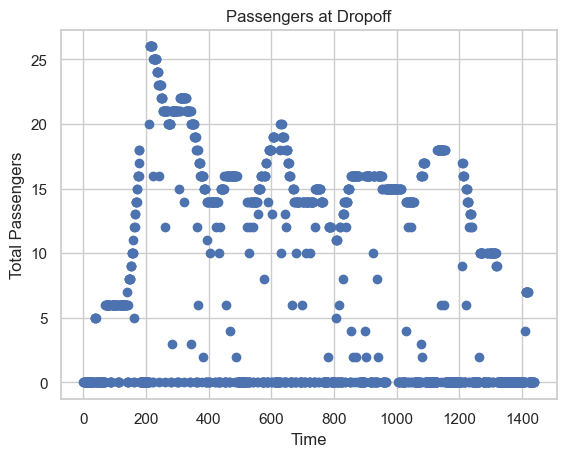

In [338]:
plt.scatter(Passengers_at_dropoff['TIME'], Passengers_at_dropoff['Total_Passengers'])
plt.xlabel('Time')
plt.ylabel('Total Passengers')
plt.title('Passengers at Dropoff')
plt.show()


In [225]:
dep_from_airport_time.sort()

In [ ]:
dep_from_airport_time

In [ ]:
for time in dep_from_airport_time:
    count = 30
    for i in range(30, -1, -1):
        if time - i >= 0:
            print('time - i:', time - i)
            if  Passengers_for_pickup['Total_Passengers'][time - i] >= count:
                print(f"Passengers for pickup: {Passengers_for_pickup.loc[time - i ,'Total_Passengers']}")

In [323]:
for time in dep_from_airport_time:
    count = 30
    for i in range(30, -1, -1):
        if time - i >= 0:
            if  Passengers_for_pickup['Total_Passengers'][time - i] >= count:
                Passengers_for_pickup.loc[time - i ,'Total_Passengers'] = Passengers_for_pickup['Total_Passengers'][time - i] - count
                print(time - i, Passengers_for_pickup['Total_Passengers'][time - i])
                count = 0
            elif Passengers_for_pickup['Total_Passengers'][time - i] < count:
                count = count - Passengers_for_pickup['Total_Passengers'][time - i]
                Passengers_for_pickup.loc[time - i ,'Total_Passengers'] = 0
                print(time - i, Passengers_for_pickup['Total_Passengers'][time - i])
        if count == 0:
            break
        # break
        



0 0.0
1 35.0
0 0.0
1 5.0
0 0.0
1 0.0
2 42.0
0 0.0
1 0.0
2 12.0
0 0.0
1 0.0
2 0.0
3 48.0
0 0.0
1 0.0
2 0.0
3 18.0
0 0.0
1 0.0
2 0.0
3 0.0
4 29.0
0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 41.0
0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 11.0
5 0.0
6 8.0
15 0.0
16 12.0
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 12.0
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 16.0
30 18.0
30 0.0
31 24.0
30 0.0
31 0.0
32 29.0
35 0.0
36 0.0
37 18.0
40 0.0
41 0.0
42 0.0
43 12.0
40 0.0
41 0.0
42 0.0
43 0.0
44 0.0
45 10.0
45 0.0
46 7.0
60 0.0
60 0.0
61 0.0
60 0.0
61 0.0
62 0.0
63 8.0
70 0.0
71 0.0
72 0.0
73 24.0
75 13.0
80 0.0
81 0.0
82 0.0
83 0.0
84 0.0
85 12.0
90 0.0
91 0.0
92 0.0
93 0.0
94 0.0
95 0.0
96 0.0
97 0.0
98 8.0
90 0.0
91 0.0
92 0.0
93 0.0
94 0.0
95 0.0
96 0.0
97 0.0
98 0.0
99 6.0
90 0.0
91 0.0
92 0.0
93 0.0
94 0.0
95 0.0
96 0.0
97 0.0
98 0.0
99 0.0
100 3.0
95 0.0
96 0.0
97 0.0
98 0.0
99 0.0
100 0.0
101 0.0
102 3.0
100 0.0
101 0.0
102 0.0
103 0.0
104 0.0
105 0.0
106 0.0
107 0.0
108 23.0
105 0.0
1

In [ ]:
Passengers_for_pickup

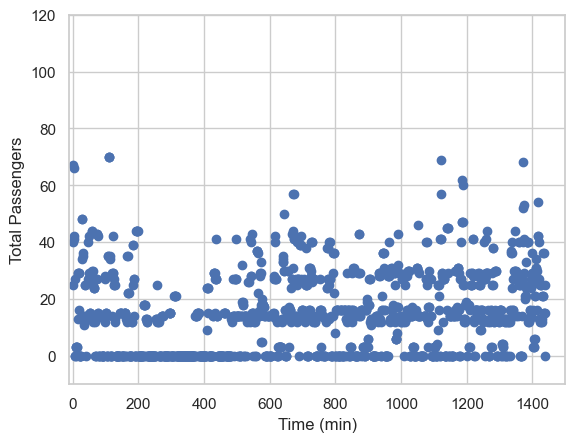

In [339]:
import matplotlib.pyplot as plt
plt.scatter(Passengers_for_pickup['TIME'], Passengers_for_pickup['Total_Passengers'])
plt.xlabel('Time (min)')
plt.ylabel('Total Passengers')
plt.xlim(-10, 1500)
plt.ylim(-10, 120)
plt.show()

In [358]:
Passengers_at_dropoff['Total_Passengers'].sum()

9455.0

In [359]:
Passengers_for_pickup['Total_Passengers'].sum()

9344.0

In [360]:
Passengers_for_pickup.to_csv('Passengers_for_pickup_with_lf_bus.csv', index=False)

In [293]:
# multiply the total passengers by 0.65 and round off to the nearest integer
Passengers_for_pickup['Total_Passengers'] = Passengers_for_pickup['Total_Passengers'] * 0.65
Passengers_for_pickup['Total_Passengers'] = Passengers_for_pickup['Total_Passengers'].round()
Passengers_at_dropoff['Total_Passengers'] = Passengers_at_dropoff['Total_Passengers'] * 0.65
Passengers_at_dropoff['Total_Passengers'] = Passengers_at_dropoff['Total_Passengers'].round()


In [304]:
Passengers_at_dropoff['Total_Passengers'] = Passengers_at_dropoff['Total_Passengers'] * 0.7
Passengers_at_dropoff['Total_Passengers'] = Passengers_at_dropoff['Total_Passengers'].round()